# Sentiment Analysis of Trevor Noah's Tweets

In this notebook, I analyzed my favorite comedian, Trevor Noah's tweets with TextBlob's sentiment analysis tools. 

This notebook is based on [a tutorial made by Rodolfo Ferro](https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-). 

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api


In [3]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="Trevornoah",count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 199.

5 recent tweets:

Tampa! Such an amazing crowd. Thank you! 🙏🏾 and to the two lovely ladies in the 2nd pic... you are truly the best! 😀 https://t.co/vvfkrOcdNk

Raleigh! If you and your friend are still debating over who I pointed to at the end, here I’ll settle it... It was… https://t.co/wE1RFGG3OV

What a great start to the tour! Thank you Norfolk, VA. You were electric!⚡️See you tomorrow Raleigh, NC… https://t.co/kNgzaZUOWD

And so it begins... My new #LoudAndClearTour kicks off tonight in Norfolk, VA! Now use two of your strongest finger… https://t.co/LkKOy5dP3I

RT @TheDailyShow: #10YearChallenge https://t.co/MYltmIgkE0



In [4]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=["Tweets"])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Tampa! Such an amazing crowd. Thank you! 🙏🏾 an...
1,Raleigh! If you and your friend are still deba...
2,What a great start to the tour! Thank you Norf...
3,And so it begins... My new #LoudAndClearTour k...
4,RT @TheDailyShow: #10YearChallenge https://t.c...
5,"Last year, Shelley was our @omaze winner and j..."
6,RT @TheDailyShow: The Daily Show &amp; @DrunkH...
7,Toronto! Thank you for 4 incredible cold-out 🥶...
8,This is amazing @paulpogba 🙌🏽🙌🏽🙌🏽🙌🏽 https://t....
9,"RT @TheDailyShow: Oh man, once Trump gets his ..."


In [5]:
# Internal methods of a single tweet object:
print(dir(tweets[0]), "\n")

print(tweets[0].text, "\n")

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user'] 

Tampa! Such an amazing crowd. Thank you! 🙏🏾 and to the two lovely ladies in the 2nd pic... you are truly the best! 😀 https://t.co/vvfkrOc

In [6]:
# We print info from the first tweet:
print("id: ", tweets[0].id)
print("created at: ", tweets[0].created_at)
print("source: ", tweets[0].source)
print("favorite count: ", tweets[0].favorite_count)
print("retweet count: ", tweets[0].retweet_count)
print("geo: ", tweets[0].geo)
print("coordinates: ", tweets[0].coordinates)
print("entities: ", tweets[0].entities)

id:  1087236108398878720
created at:  2019-01-21 06:31:02
source:  Twitter for iPhone
favorite count:  7311
retweet count:  440
geo:  None
coordinates:  None
entities:  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1087236092800061440, 'id_str': '1087236092800061440', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/Dxajd0pU0AAnjT7.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Dxajd0pU0AAnjT7.jpg', 'url': 'https://t.co/vvfkrOcdNk', 'display_url': 'pic.twitter.com/vvfkrOcdNk', 'expanded_url': 'https://twitter.com/Trevornoah/status/1087236108398878720/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1954, 'h': 2048, 'resize': 'fit'}, 'small': {'w': 649, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1145, 'h': 1200, 'resize': 'fit'}}}]}


In [7]:
# We add relevant data:
data["length"] = np.array([len(tweet.text) for tweet in tweets])
data["ID"] = np.array([tweet.id for tweet in tweets])
data["Date"] = np.array([tweet.created_at for tweet in tweets])
data["Source"] = np.array([tweet.source for tweet in tweets])
data["Likes"] = np.array([tweet.favorite_count for tweet in tweets])
data["RTs"] = np.array([tweet.retweet_count for tweet in tweets])

In [8]:
# Display of first 10 elements from dataframe:
data.head(10)

,Tweets,length,ID,Date,Source,Likes,RTs
0,Tampa! Such an amazing crowd. Thank you! 🙏🏾 an...,140,1087236108398878720,2019-01-21 06:31:02,Twitter for iPhone,7311,440
1,Raleigh! If you and your friend are still deba...,139,1086856503108272129,2019-01-20 05:22:37,Twitter for iPhone,3334,322
2,What a great start to the tour! Thank you Norf...,128,1086464896999571456,2019-01-19 03:26:31,Twitter for iPhone,1440,93
3,And so it begins... My new #LoudAndClearTour k...,140,1086280570253033472,2019-01-18 15:14:04,Twitter for iPhone,2812,334
4,RT @TheDailyShow: #10YearChallenge https://t.c...,58,1085644939831042048,2019-01-16 21:08:18,Twitter for iPhone,0,967
5,"Last year, Shelley was our @omaze winner and j...",140,1085553520026234881,2019-01-16 15:05:02,Twitter Web Client,613,91
6,RT @TheDailyShow: The Daily Show &amp; @DrunkH...,99,1085002294066851841,2019-01-15 02:34:39,Twitter for iPhone,0,1641
7,Toronto! Thank you for 4 incredible cold-out 🥶...,141,1084522505732268032,2019-01-13 18:48:09,Twitter for iPhone,3131,251
8,This is amazing @paulpogba 🙌🏽🙌🏽🙌🏽🙌🏽 https://t....,59,1083235414549385228,2019-01-10 05:33:43,Twitter for iPhone,13637,2537
9,"RT @TheDailyShow: Oh man, once Trump gets his ...",134,1083171188967387136,2019-01-10 01:18:30,Twitter for iPhone,0,166815


In [9]:
# We extract the mean of lenghts:
mean = np.mean(data['length'])

print("The average of tweets' length: {}".format(mean))

The average of tweets' length: 102.34170854271356


In [10]:
# We extract the tweet with more FAVs and more RTs:
fav_max = np.max(data["Likes"])
rt_max = np.max(data["RTs"])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more like is: \n{}".format(data["Tweets"][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters. \n".format(data["length"][fav]))

# Max RTs:
print("The tweet with more retweet is: \n{}".format(data["Tweets"][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters. \n".format(data["length"][rt]))

The tweet with more like is: 
Happy Father's Day to my mom and all the single moms out there, who for whatever reason had to hold it down twice a… https://t.co/jgupynkPWK
Number of likes: 70414
140 characters. 

The tweet with more retweet is: 
RT @junathaenw22: Y’all please help me make little man go viral! https://t.co/5Qkcj72C5E
Number of retweets: 329218
88 characters. 



In [11]:
# We create time series for data:

tlen = pd.Series(data=data["length"].values, index=data["Date"])
tfav = pd.Series(data=data["Likes"].values, index=data["Date"])
tret = pd.Series(data=data["RTs"].values, index=data["Date"])

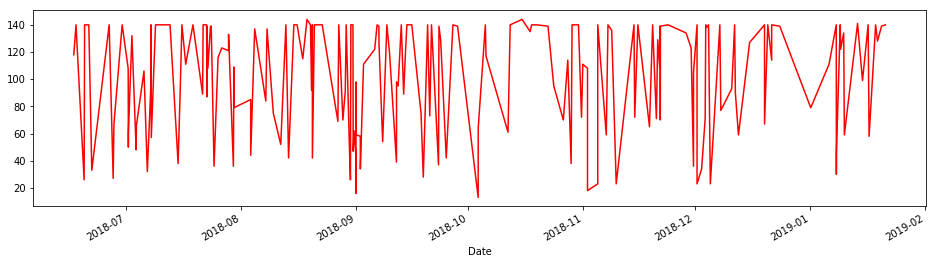

In [12]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color="r")

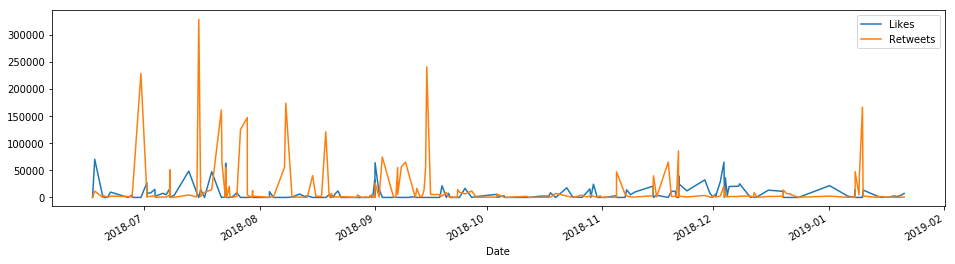

In [13]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True)

In [14]:
# We obtain all possible sources:
sources = []
for source in data["Source"]:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Web Client
* TweetDeck
* Twitter Web App


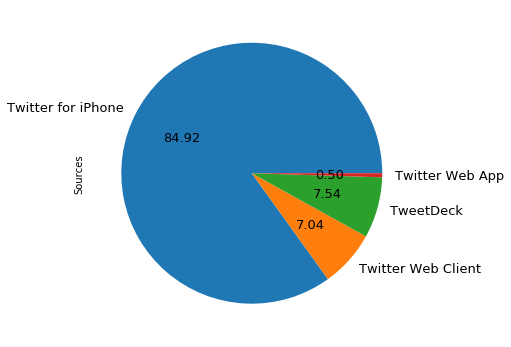

In [15]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data["Source"]:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
        
percent /= 100

# Pie chart:
pie_chart = pd.Series(data = percent, index=sources, name="Sources")
pie_chart.plot.pie(fontsize=13, autopct="%.2f", figsize=(6,6))

In [16]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [17]:
# We create a column with the result of the analysis:
data["SA"] = np.array([analize_sentiment(tweet) for tweet in data["Tweets"]])

# We display the updated dataframe with the new column:
data.head(10)

,Tweets,length,ID,Date,Source,Likes,RTs,SA
0,Tampa! Such an amazing crowd. Thank you! 🙏🏾 an...,140,1087236108398878720,2019-01-21 06:31:02,Twitter for iPhone,7311,440,1
1,Raleigh! If you and your friend are still deba...,139,1086856503108272129,2019-01-20 05:22:37,Twitter for iPhone,3334,322,0
2,What a great start to the tour! Thank you Norf...,128,1086464896999571456,2019-01-19 03:26:31,Twitter for iPhone,1440,93,1
3,And so it begins... My new #LoudAndClearTour k...,140,1086280570253033472,2019-01-18 15:14:04,Twitter for iPhone,2812,334,1
4,RT @TheDailyShow: #10YearChallenge https://t.c...,58,1085644939831042048,2019-01-16 21:08:18,Twitter for iPhone,0,967,0
5,"Last year, Shelley was our @omaze winner and j...",140,1085553520026234881,2019-01-16 15:05:02,Twitter Web Client,613,91,0
6,RT @TheDailyShow: The Daily Show &amp; @DrunkH...,99,1085002294066851841,2019-01-15 02:34:39,Twitter for iPhone,0,1641,0
7,Toronto! Thank you for 4 incredible cold-out 🥶...,141,1084522505732268032,2019-01-13 18:48:09,Twitter for iPhone,3131,251,1
8,This is amazing @paulpogba 🙌🏽🙌🏽🙌🏽🙌🏽 https://t....,59,1083235414549385228,2019-01-10 05:33:43,Twitter for iPhone,13637,2537,1
9,"RT @TheDailyShow: Oh man, once Trump gets his ...",134,1083171188967387136,2019-01-10 01:18:30,Twitter for iPhone,0,166815,1


In [18]:
# We construct lists with classified tweets:

pos_tweets = [tweet for index, tweet in enumerate(data["Tweets"]) if data["SA"][index] > 0]
neu_tweets = [tweet for index, tweet in enumerate(data["Tweets"]) if data["SA"][index] == 0]
neg_tweets = [tweet for index, tweet in enumerate(data["Tweets"]) if data["SA"][index] < 0]

In [19]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 43.71859296482412%
Percentage of neutral tweets: 42.71356783919598%
Percentage de negative tweets: 13.5678391959799%


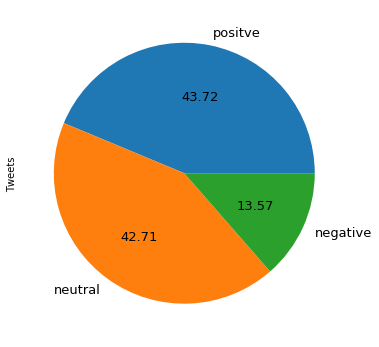

In [20]:
pos_percent = len(pos_tweets)/len(data['Tweets'])
neu_percent = len(neu_tweets)/len(data['Tweets'])
neg_percent = len(neg_tweets)/len(data['Tweets'])
sa_percent = np.array([pos_percent, neu_percent, neg_percent])

sa_category = ['positve', 'neutral', 'negative']

sa_pie_chart = pd.Series(data=sa_percent, index=sa_category, name="Tweets")
sa_pie_chart.plot.pie(fontsize=13, autopct="%.2f", figsize=(6,6))